In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def aucscore(y_scores, y_true):
    from sklearn.metrics import roc_auc_score
    try:
        auc = roc_auc_score(y_true, y_scores)
    except:
        auc = np.nan
    return auc

In [9]:
stepwise = pd.read_csv('./results/senescence_stepwise-pred-output.txt',sep='\t')
stepwise['test_type'] = 'stepwise'
TM = pd.read_csv('./results/senescence_TM-pred-output.txt',sep='\t')
TM['test_type'] = 'TM'
other = pd.read_csv('./results/senescence_other-pred-output.txt',sep='\t')
allperf = pd.concat([stepwise,other,TM]).reset_index(drop=True)

### Within-Cohort accuracy comparison between biomarkers

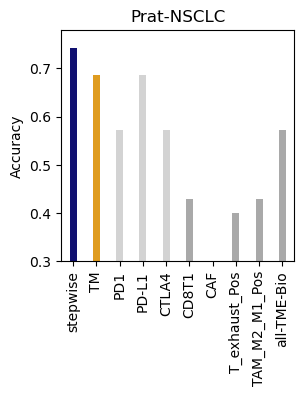

In [4]:
#within cohort accuracy comparison between biomarkers

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(3,3))
tempdata = allperf.groupby('test_type').apply(lambda x: np.mean(x['predicted_response']==x['obs_response'])).reset_index()
tempdata.columns = ['test_type','accuracy']
sns.barplot(x='test_type',y='accuracy',data=tempdata,order=['stepwise','TM','PD1','PD-L1','CTLA4','CD8T1','CAF','T_exhaust_Pos','TAM_M2_M1_Pos','all-TME-Bio'],width=.3,palette=['navy','orange','lightgrey','lightgrey','lightgrey','darkgrey','darkgrey','darkgrey','darkgrey','darkgrey'])
plt.xticks(rotation=90)
plt.ylim(.3)
plt.title('Prat-NSCLC')
plt.ylabel('Accuracy')
plt.xlabel('')
plt.show()

In [37]:
fflogistic = pd.read_csv('./results/senescence_fflogistic-pred-output.txt',sep='\t')
fflogistic['test_type'] = 'fflogistic'
ffmlp = pd.read_csv('./results/senescence_ffmlp-pred-output.txt',sep='\t')
ffmlp['test_type'] = 'ffmlp'
ffrf = pd.read_csv('./results/senescence_ffrf-pred-output.txt',sep='\t')
ffrf['test_type'] = 'ffrf'
ffsvc = pd.read_csv('./results/senescence_ffsvc-pred-output.txt',sep='\t')
ffsvc['test_type'] = 'ffsvc'
ffmodels = pd.concat([fflogistic,ffmlp,ffrf,ffsvc]).reset_index(drop=True)

In [45]:
tempdata = allperf.groupby('test_type').apply(lambda x: np.mean(x['predicted_response']==x['obs_response'])).reset_index()
tempdata.columns = ['test_type','accuracy']
fftempdata = ffmodels.groupby('test_type').apply(lambda x: np.mean(x['predicted_response']==x['obs_response'])).reset_index()
fftempdata.columns = ['test_type','accuracy']

# tempdata = allperf.groupby('test_type').apply(lambda x: aucscore(x['pred_proba'],x['obs_response'])).reset_index()
# tempdata.columns = ['test_type','accuracy']
# fftempdata = ffmodels.groupby('test_type').apply(lambda x: aucscore(x['pred_proba'],x['obs_response'])).reset_index()
# fftempdata.columns = ['test_type','accuracy']

### Within-Cohort accuracy comparison between Stepwise framework/Target-based model(TM)/Full Feature models

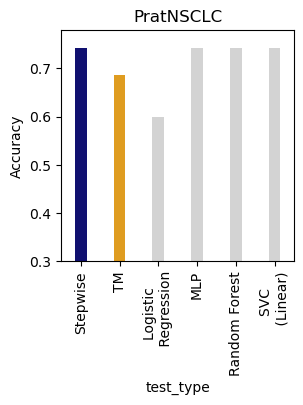

In [80]:
### within cohort accuracy comparison between stepwise framework, TM, Full Feature models
plt.figure(figsize=(3,3))
sns.barplot(x='test_type',y='accuracy',data=pd.concat([tempdata,fftempdata]),order=['stepwise','TM','fflogistic','ffmlp','ffrf','ffsvc'],width=.3,palette=['navy','orange','lightgrey','lightgrey','lightgrey','lightgrey'])
plt.xticks(rotation=90)
labels=['Stepwise','TM','Logistic \n Regression','MLP','Random Forest','SVC \n (Linear)']
plt.xticks(ticks=range(6),labels=labels)
plt.ylim(.3)
plt.title('PratNSCLC')
plt.ylabel('Accuracy')
plt.show()

In [71]:
steptrainauc = stepwise[['test_type','train_auc']].groupby('test_type').mean().reset_index()
steptestauc = stepwise.groupby(['test_type']).apply(lambda x: aucscore(x['pred_proba'],x['obs_response'])).reset_index()
stepgap = steptrainauc.merge(steptestauc,on='test_type')
stepgap.columns = ['test_type','train_auc','test_auc']
stepgap['traintest_gap'] = stepgap['train_auc'] - stepgap['test_auc']
fftrainauc = ffmodels[['test_type','train_auc']].groupby('test_type').mean().reset_index()
fftestauc = ffmodels.groupby(['test_type']).apply(lambda x: aucscore(x['pred_proba'],x['obs_response'])).reset_index()
ffgap = fftrainauc.merge(fftestauc,on='test_type')
ffgap.columns = ['test_type','train_auc','test_auc']
ffgap['traintest_gap'] = ffgap['train_auc'] - ffgap['test_auc']
gaps = pd.concat([stepgap,ffgap]).reset_index(drop=True)

### Train-test AUC gap comparison between Stepwise framework and Full Feature models

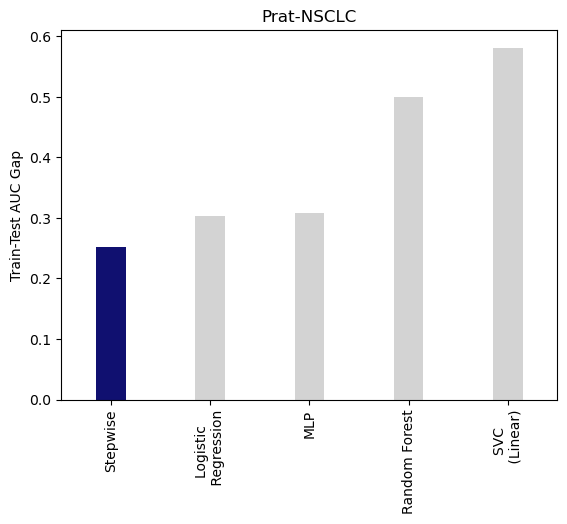

In [84]:
#train test AUC gap comparison between Full Feature models and Stepwise model
sns.barplot(data=gaps,x='test_type',y='traintest_gap',
            order=['stepwise','fflogistic','ffmlp','ffrf','ffsvc'],
            palette=['navy','lightgrey','lightgrey','lightgrey','lightgrey'],width=.3)
plt.xticks(rotation=90)
labels=['Stepwise','Logistic \n Regression','MLP','Random Forest','SVC \n (Linear)']
plt.xticks(ticks=range(5),labels=labels)
plt.ylabel('Train-Test AUC Gap')
plt.xlabel('')
plt.title('Prat-NSCLC')
plt.show()

### Within-cohort accuracy comparison between Senescence-based model(SM), TM, Full Feature models

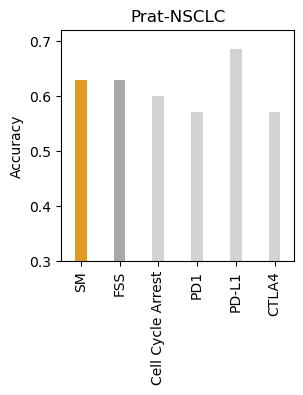

In [6]:
#supplementary fig S11

import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(3,3))
tempdata = allperf.groupby('test_type').apply(lambda x: np.mean(x['predicted_response']==x['obs_response'])).reset_index()
tempdata.columns = ['test_type','accuracy']
sns.barplot(x='test_type',y='accuracy',data=tempdata,order=['NetBio-senescence','FSS','senescence','PD1','PD-L1','CTLA4'],\
            width=.3,palette=['orange','darkgrey','lightgrey','lightgrey','lightgrey','lightgrey'])
plt.xticks(rotation=90)
labels = ['SM','FSS','Cell Cycle Arrest','PD1','PD-L1','CTLA4']
plt.xticks(range(len(labels)),labels)
plt.xlabel('')
plt.ylim(.3)
plt.title('Prat-NSCLC')
plt.ylabel('Accuracy')
plt.show()